# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'datasets/traffic-signs-data/train.p'
validation_file ='datasets/traffic-signs-data/valid.p'
testing_file = 'datasets/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)
(12630, 32, 32, 3)
(12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1], X_train.shape[2]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = y_train.max() + 1 

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
# Functions

def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels

def disp_imgs_by_class(data_x, data_y, n_class=None, n_cols=15):
    if n_class is None:
        n_class = data_y.max() + 1
    n_rows = n_class // 3
    if n_class % 3 > 0:
        n_rows += 1
    fig, axarr = plt.subplots(
        n_rows, n_cols, figsize=(n_cols, n_rows * (4/3)),
        subplot_kw={'xticks': [], 'yticks': []})
    class_i = 0
    k = 0
    while class_i < n_class:
        figs = data_x[np.where(data_y == class_i)[0]]
        for j in np.arange(0, n_cols):
            axarr[k, j].imshow(figs[np.random.randint(0, figs.shape[0] - 1)])
            axarr[k, j].set_title('Class ' + str(class_i + 1))
            if j == (n_cols / 3) - 1 or j == (2 * n_cols / 3) - 1:
                class_i += 1
                figs = data_x[np.where(data_y == class_i)[0]]
                if class_i >= n_class:
                    break
        class_i += 1
        k += 1
    plt.show()
    plt.close()

def print_n_of_class_examples(data_x, data_y):
    n_class = data_y.max() + 1
    min_n = {'class': -1, 'val': np.inf}
    max_n = {'class': -1, 'val': 0}
    for i in np.arange(0, n_class):
        figs = data_x[np.where(data_y == i)[0]]
        n_ex = figs.shape[0]
        print('Number of examples for class_' + str(i + 1) + ': ' + str(n_ex))
        if n_ex > max_n['val']:
            max_n['val'] = n_ex
            max_n['class'] = i
        if n_ex < min_n['val']:
            min_n['val'] = n_ex
            min_n['class'] = i
    print('Max number of examples: ' + str(max_n['val']) + ' at class_' + 
          str(max_n['class']))
    print('Min number of examples: ' + str(min_n['val']) + ' at class_' + 
          str(min_n['class']))

In [4]:
# Randomize datasets
np.random.seed(18363)
X_train, y_train = randomize(X_train, y_train)
X_valid, y_valid = randomize(X_valid, y_valid)
X_test, y_test = randomize(X_test, y_test)

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

#### Train Dataset

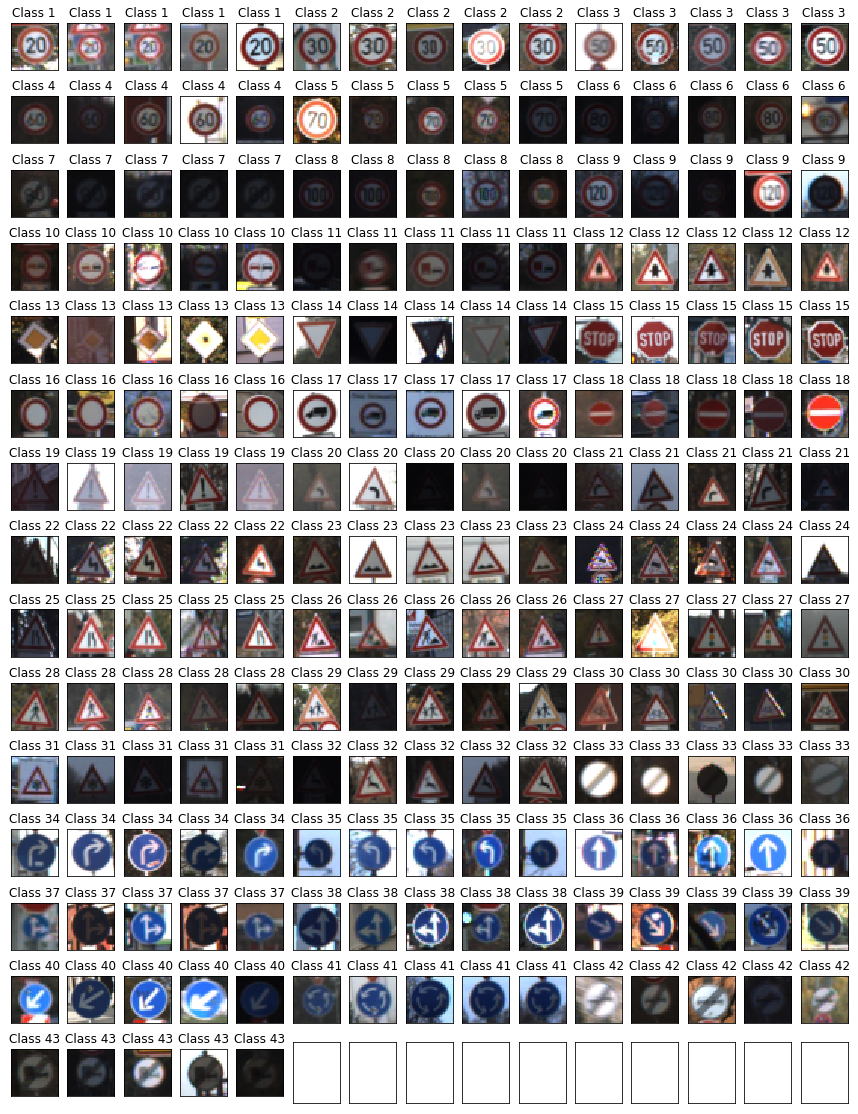

In [6]:
# train dataset visualization
disp_imgs_by_class(X_train, y_train, n_class=43, n_cols=15)

#### Validation Dataset

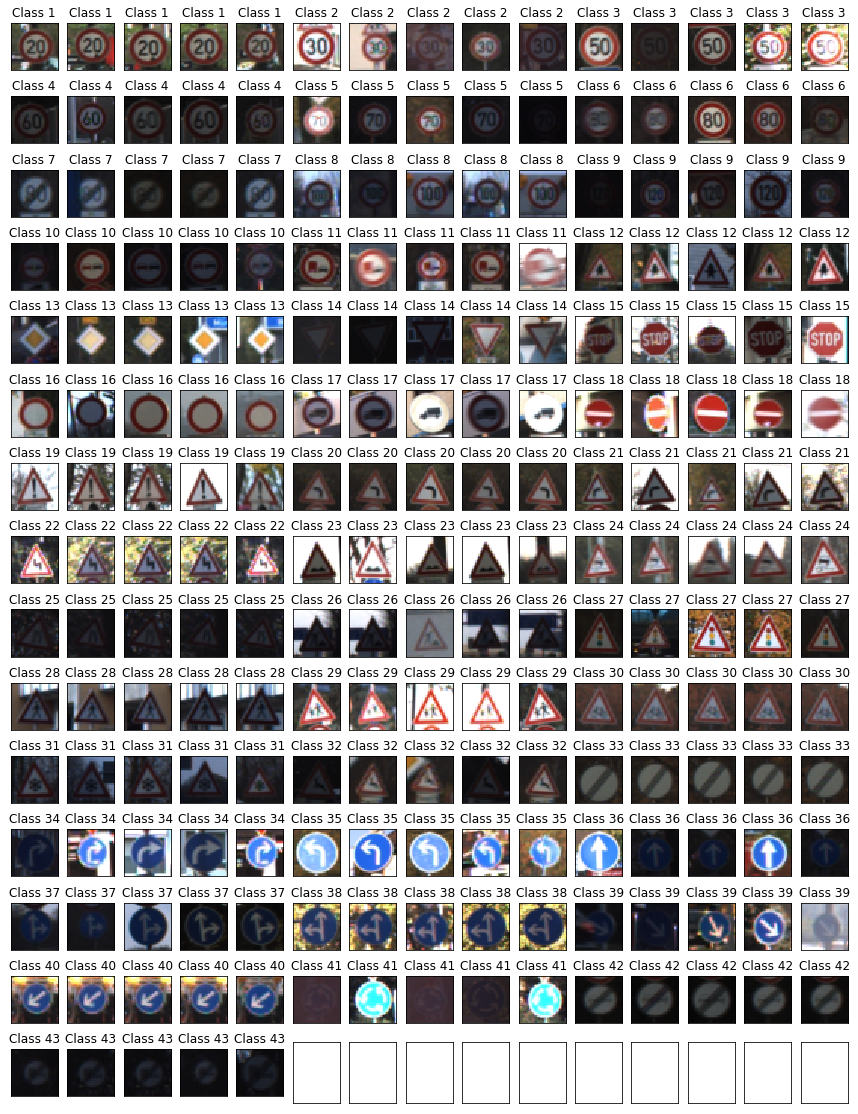

In [7]:
# For validation dataset
disp_imgs_by_class(X_valid, y_valid, n_class=43, n_cols=15)

#### Test Dataset

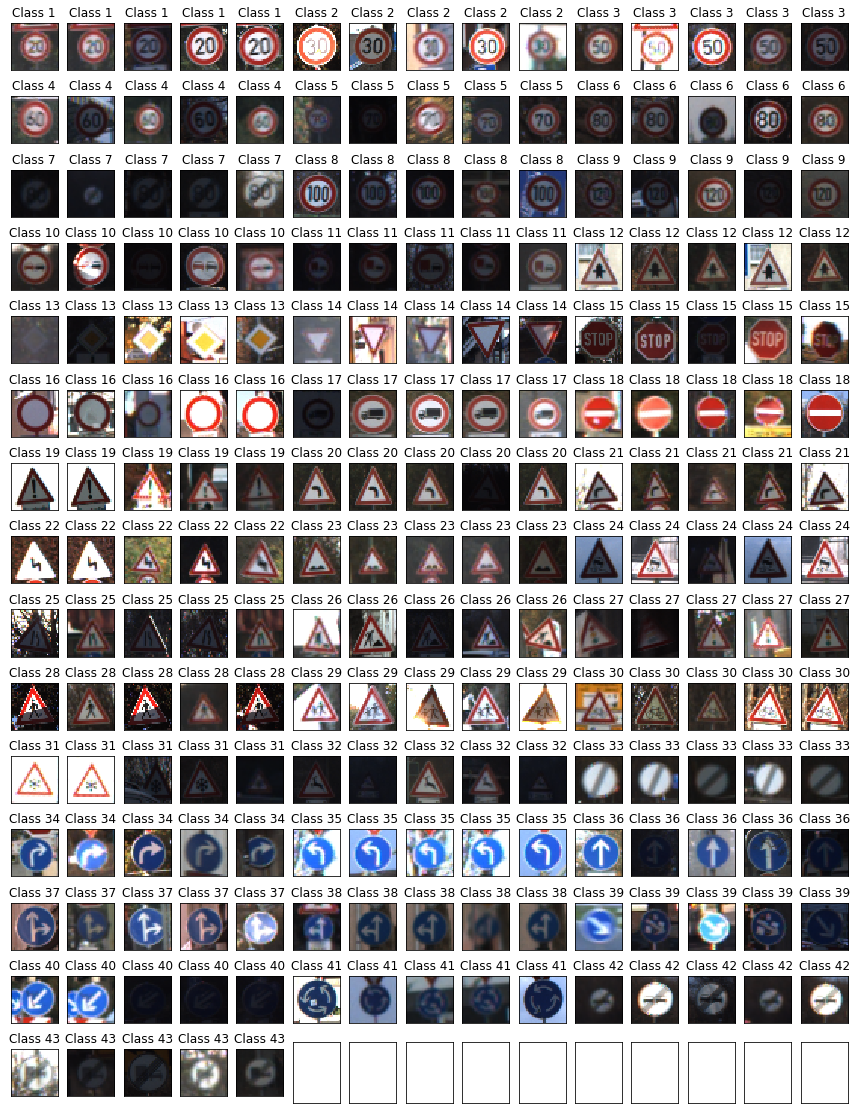

In [8]:
# For test dataset
disp_imgs_by_class(X_test, y_test, n_class=43, n_cols=15)

In [9]:
# classes histogram function
def hist_classes(X, Y, title=None):
    d = np.diff(np.unique(Y)).min()
    left_of_first_bin = Y.min() - float(d)/2
    right_of_last_bin = Y.max() + float(d)/2
    if title is not None:
        plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of examples')
    plt.hist(Y, np.arange(left_of_first_bin, right_of_last_bin + d, d))
    #plt.xticks(np.arange(1, 44))
    #plt.tick_params(axis='both', which='major', labelsize=6)

#### The frequency disribution of examples in train dataset

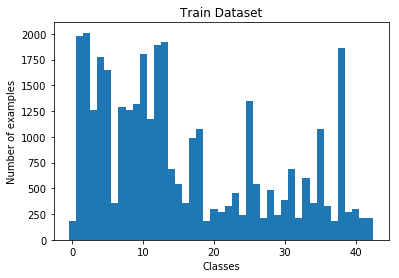

In [10]:
# number of samples for each class in train dataset
hist_classes(X_train, y_train, title='Train Dataset')

#### The frequency disribution of examples in validation dataset

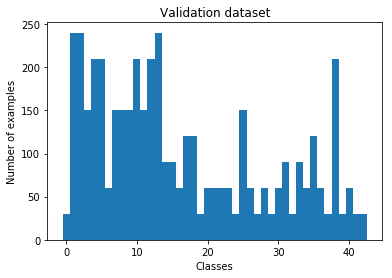

In [11]:
# number of samples for each class in validation dataset
hist_classes(X_valid, y_valid, title='Validation dataset')

#### The frequency disribution of examples in test dataset

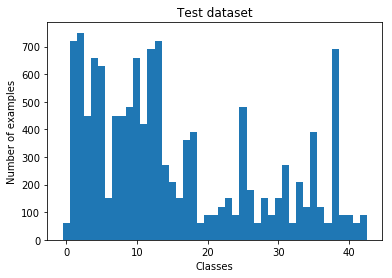

In [12]:
# number of samples for each class in test dataset
hist_classes(X_test, y_test, title='Test dataset')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [13]:
### Preprocess the data here. It is required to normalize the data. 
### Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# At first let's see the dimensions
print(X_train.shape)
# And the examples for the values
print(X_train[0, 0:5, 0:5, 0])
print(X_train[:, 0, :, 0].max())
print(X_train[:, 0, :, 0].min())

(34799, 32, 32, 3)
[[165 162 157 155 156]
 [165 161 158 155 155]
 [159 155 156 154 152]
 [152 149 149 148 149]
 [149 149 149 147 147]]
255
1


So we will first convert these integer values to floats and then normalize.

In [14]:
image_size = 32
pixel_depth = 255.0

X_train_norm =  (X_train.astype(np.float32)-(pixel_depth*0.5)) / (pixel_depth*0.5)
X_valid_norm =  (X_valid.astype(np.float32)-(pixel_depth*0.5)) / (pixel_depth*0.5)
X_test_norm =  (X_test.astype(np.float32)-(pixel_depth*0.5)) / (pixel_depth*0.5)

print(X_train_norm[0, 0:5, 0:5, 0])
print(X_train_norm[:, 0, :, 0].max())
print(X_train_norm[:, 0, :, 0].min())

[[ 0.29411766  0.27058825  0.23137255  0.21568628  0.22352941]
 [ 0.29411766  0.26274511  0.23921569  0.21568628  0.21568628]
 [ 0.24705882  0.21568628  0.22352941  0.20784314  0.19215687]
 [ 0.19215687  0.16862746  0.16862746  0.16078432  0.16862746]
 [ 0.16862746  0.16862746  0.16862746  0.15294118  0.15294118]]
1.0
-0.992157


### Model Architecture

In [15]:
# Imports
import tensorflow as tf
import timeit
from functools import reduce
import os
from six.moves import cPickle as pickle

In [16]:
# Model Classes

# The class of the LeNet model
class LeNet(object):
    """A class defining the Lenet-5 model with the TensorFlow framework.

    Attributes:
        num_labels: An integer representing the number of classes.
        learning_rate: A float to represent the learning rate of the optimization process.
        batch_size: An integer to represents the number of examples in each batch.
        decay_interval: An integer to represent decay interval.
        dropout: A boolean variable to indicate if dropout will be used or not.

    """

    def __init__(self, num_labels, learning_rate=0.01, batch_size=128, 
                 decay_interval=5000, dropout=False):

        self.num_labels = num_labels
        self.alpha = learning_rate
        self.batch_size = batch_size
        self.decay_interval = decay_interval
        self.dropout_flag = dropout
        self.image_size = 32
        
    def init_model(self):
        """Call this method just before using the model."""
        
        tf.reset_default_graph()
        
        # Model Variables
        self.W_1 = tf.get_variable("W1", shape=[5, 5, 3, 6],
                                       initializer=tf.contrib.layers.xavier_initializer())
        self.b_1 = tf.Variable(tf.zeros([6]))
        self.W_2 = tf.get_variable("W2", shape=[5, 5, 6, 16],
                                       initializer=tf.contrib.layers.xavier_initializer())
        self.b_2 = tf.Variable(tf.zeros([16]))
        self.W_3 = tf.get_variable("W3", shape=[400, 120],
                                       initializer=tf.contrib.layers.xavier_initializer())
        self.b_3 = tf.Variable(tf.zeros([120]))
        self.W_4 = tf.get_variable("W4", shape=[120, 84],
                                       initializer=tf.contrib.layers.xavier_initializer())
        self.b_4 = tf.Variable(tf.zeros([84]))
        self.W_5 = tf.get_variable("W5", shape=[84, self.num_labels],
                                       initializer=tf.contrib.layers.xavier_initializer())
        self.b_5 = tf.Variable(tf.zeros([self.num_labels]))

        # Parameters
        self.global_step = tf.Variable(0)
        self.learning_rate = tf.train.exponential_decay(self.alpha, self.global_step, 
                                                        self.decay_interval, 
                                                        0.95, staircase=True)
        self.X = tf.placeholder(
                    tf.float32, shape=(batch_size, self.image_size, self.image_size, 3))
        self.Y = tf.placeholder(tf.int32, shape=(batch_size))
        Y_one_hot = tf.one_hot(self.Y, self.num_labels)

        # Get logits
        if self.dropout_flag:
            train_logits, dropout_logits = self.get_logits(self.X, dropout=True)
            logits = self.get_logits(self.X, dropout=False)
            # Get loss
            self.loss = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=Y_one_hot, logits=dropout_logits))
            # Prediction and accuracy for train dataset
            train_prediction = tf.equal(tf.argmax(train_logits, 1), tf.argmax(Y_one_hot, 1))
        else:
            logits = self.get_logits(self.X, dropout=False)
            # Get loss
            self.loss = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(labels=Y_one_hot, logits=logits))
            # Prediction and accuracy for train dataset
            train_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y_one_hot, 1))
        # Optimizer
        self.optimizer = tf.train.GradientDescentOptimizer(self.learning_rate)\
                            .minimize(self.loss, global_step=self.global_step)
        # Prediction and accuracy
        self.train_accuracy_operation = tf.reduce_mean(tf.cast(train_prediction, tf.float32))
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y_one_hot, 1))
        self.accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        # F1 scoring
        predictions = tf.one_hot(tf.argmax(logits, 1), self.num_labels, dtype=tf.int32)
        actuals = tf.to_int32(Y_one_hot)
        self.TP = tf.count_nonzero(predictions * actuals, axis=0)
        self.FP = tf.count_nonzero(predictions * (actuals - 1), axis=0)
        self.FN = tf.count_nonzero((predictions - 1) * actuals, axis=0)



    def get_logits(self, X, dropout=None):
        """Get the logits of the top layer.
        
        If `dropout` is `True`, logits are returned for both dropout 
        applied and not. If `False`, only the logits returned that 
        dropout is not applied.
        """
        lenet_w_dropout
        if dropout is None:
            dropout=self.dropout_flag

        conv = tf.nn.conv2d(X, self.W_1, [1, 1, 1, 1], padding='VALID')
        hidden = tf.nn.relu(conv + self.b_1)
        pool = tf.nn.max_pool(hidden, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
        conv = tf.nn.conv2d(pool, self.W_2, [1, 1, 1, 1], padding='VALID')
        hidden = tf.nn.relu(conv + self.b_2)
        pool = tf.nn.max_pool(hidden, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
        shape = pool.get_shape().as_list()
        reshape = tf.reshape(pool, [shape[0], shape[1] * shape[2] * shape[3]])
        hidden1 = tf.nn.relu(tf.matmul(reshape, self.W_3) + self.b_3)
        def apply_dropout(hidden):
            dropout = tf.nn.dropout(hidden, 0.5)
            hidden = tf.nn.relu(tf.matmul(dropout, self.W_4) + self.b_4)
            dropout = tf.nn.dropout(hidden, 0.5)
            logits = tf.matmul(dropout, self.W_5) + self.b_5
            return logits
        hidden2 = tf.nn.relu(tf.matmul(hidden1, self.W_4) + self.b_4)
        logits = tf.matmul(hidden2, self.W_5) + self.b_5
        if dropout:
            return logits, apply_dropout(hidden1)
        else:
            return logits


    def evaluate(self, data_X, data_Y, sess=None, f1score=False):
        """Get accuracy using minibatches.
        
        Use it for validation and test datasets.
        """

        if sess is None:
            sess = tf.get_default_session()
        n_batches = data_X.shape[0] // batch_size
        total_accuracy = 0.
        if f1score:
            total_TP = np.zeros(self.num_labels, dtype=np.float32)
            total_FP = np.zeros(self.num_labels, dtype=np.float32)
            total_FN = np.zeros(self.num_labels, dtype=np.float32)
        for minibatch_index in range(n_batches):
            batch_X = data_X[minibatch_index * batch_size:(minibatch_index + 1) * batch_size]
            batch_Y = data_Y[minibatch_index * batch_size:(minibatch_index + 1) * batch_size]
            if f1score:
                accuracy, TP_, FP_, FN_ = sess.run(
                    [self.accuracy_operation, self.TP, self.FP, self.FN],
                    feed_dict={self.X: batch_X, self.Y: batch_Y})
                total_TP += TP_
                total_FP += FP_
                total_FN += FN_
            else:
                accuracy = sess.run(
                    [self.accuracy_operation, self.TP, self.FP, self.FN],
                    feed_dict={self.X: batch_X, self.Y: batch_Y})
            total_accuracy += (accuracy * batch_size)
        accuracy = total_accuracy / (n_batches * batch_size)
        if f1score:
            precision = total_TP / (total_TP + total_FP + 1e-6)
            recall = total_TP / (total_TP + total_FN + 1e-6)
            f1_scores = 2 * precision * recall / (precision + recall + 1e-6)
            return accuracy, f1_scores
        else:
            return accuracy

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
from trainer import *

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

num_labels = 43
batch_size = 128

# pack datasets into a tuple
datasets = ((X_train_norm, y_train), (X_valid_norm, y_valid), (X_test_norm, y_test))

# trainer instance
trainer = Trainer(datasets=datasets, batch_size=batch_size, n_epochs=200)

# Models

# the LeNet model
lenet = LeNet(num_labels, learning_rate=0.1, batch_size=batch_size)

# the LeNet model with dopout
lenet_w_dropout = LeNet(
    num_labels, learning_rate=0.1,
    batch_size=batch_size, decay_interval=10000, 
    dropout=True)

#### LeNet without dropout

In [19]:
# train lenet
trainer.run(lenet, 'saved-lenet', n_epochs=200)

Initialized
Minibatch loss at epoch 1 and iter 270: 0.939222 and the learning rate: 0.100000
Minibatch train and validation accuracy: 69.531%, 62.868%
Time interval: 6.5233 seconds, estimated run time for 200 epochs: 0.3624 hours
Model saved
Minibatch loss at epoch 2 and iter 541: 0.243976 and the learning rate: 0.100000
Minibatch train and validation accuracy: 92.969%, 84.628%
Time interval: 5.8196 seconds, estimated run time for 200 epochs: 0.3429 hours
Model saved
Minibatch loss at epoch 3 and iter 812: 0.065285 and the learning rate: 0.100000
Minibatch train and validation accuracy: 98.438%, 88.097%
Time interval: 5.7600 seconds, estimated run time for 200 epochs: 0.3352 hours
Model saved
Minibatch loss at epoch 4 and iter 1083: 0.037176 and the learning rate: 0.100000
Minibatch train and validation accuracy: 100.000%, 89.936%
Time interval: 5.8498 seconds, estimated run time for 200 epochs: 0.3327 hours
Model saved
Minibatch loss at epoch 5 and iter 1354: 0.029098 and the learning

Minibatch loss at epoch 38 and iter 10297: 0.000174 and the learning rate: 0.090250
Minibatch train and validation accuracy: 100.000%, 92.302%
Time interval: 5.8168 seconds, estimated run time for 200 epochs: 0.3216 hours
Minibatch loss at epoch 39 and iter 10568: 0.000171 and the learning rate: 0.090250
Minibatch train and validation accuracy: 100.000%, 92.256%
Time interval: 5.7017 seconds, estimated run time for 200 epochs: 0.3215 hours
Final Test accuracy: 91.0%
INFO:tensorflow:Restoring parameters from saved-lenet/best-model-session
Test accuracy with the best model: 91.175%
f1-scores of classes:
[ 0.61855626  0.90282518  0.92650872  0.9162991   0.90757531  0.89660698
  0.9110316   0.90070868  0.89473641  0.94887477  0.98323125  0.94886994
  0.96196824  0.98890388  0.98175132  0.91795957  0.98305035  0.97435844
  0.82644582  0.78461492  0.7839191   0.5249995   0.88311636  0.87195069
  0.59872568  0.90848905  0.7882033   0.52336401  0.87719256  0.80373788
  0.58992755  0.91814893  

*Trained with NVIDIA Geforce GT 650M.*

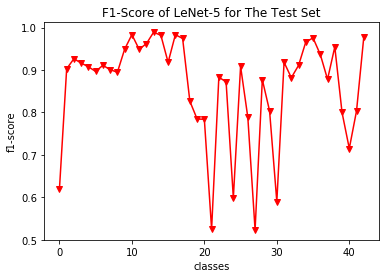

In [20]:
# plot f1 scores
path = './saved-lenet/best-test-f1-scores.pkl'
with open(path, mode='rb') as f:
    score_list = pickle.load(f)
    classes = np.arange(43)
    plt.plot(classes, score_list, marker='v', color='red')
    plt.title('F1-Score of LeNet-5 for The Test Set')
    plt.ylabel('f1-score')
    plt.xlabel('classes')
    plt.show()
    plt.close()

#### LeNet with dropout

In [21]:
trainer.run(lenet_w_dropout, 'saved-lenet-w-dropout', n_epochs=200)

Initialized
Minibatch loss at epoch 1 and iter 270: 2.340398 and the learning rate: 0.100000
Minibatch train and validation accuracy: 48.438%, 42.854%
Time interval: 5.8318 seconds, estimated run time for 200 epochs: 0.3240 hours
Model saved
Minibatch loss at epoch 2 and iter 541: 1.400927 and the learning rate: 0.100000
Minibatch train and validation accuracy: 71.094%, 67.900%
Time interval: 5.7344 seconds, estimated run time for 200 epochs: 0.3213 hours
Model saved
Minibatch loss at epoch 3 and iter 812: 0.959785 and the learning rate: 0.100000
Minibatch train and validation accuracy: 84.375%, 77.803%
Time interval: 5.9181 seconds, estimated run time for 200 epochs: 0.3238 hours
Model saved
Minibatch loss at epoch 4 and iter 1083: 0.712124 and the learning rate: 0.100000
Minibatch train and validation accuracy: 89.844%, 83.203%
Time interval: 5.8547 seconds, estimated run time for 200 epochs: 0.3242 hours
Model saved
Minibatch loss at epoch 5 and iter 1354: 0.671401 and the learning 

Minibatch loss at epoch 38 and iter 10297: 0.112936 and the learning rate: 0.095000
Minibatch train and validation accuracy: 100.000%, 96.255%
Time interval: 5.7343 seconds, estimated run time for 200 epochs: 0.3235 hours
Minibatch loss at epoch 39 and iter 10568: 0.059597 and the learning rate: 0.095000
Minibatch train and validation accuracy: 100.000%, 96.392%
Time interval: 5.9476 seconds, estimated run time for 200 epochs: 0.3237 hours
Minibatch loss at epoch 40 and iter 10839: 0.123606 and the learning rate: 0.095000
Minibatch train and validation accuracy: 100.000%, 96.507%
Time interval: 5.7571 seconds, estimated run time for 200 epochs: 0.3236 hours
Minibatch loss at epoch 41 and iter 11110: 0.151027 and the learning rate: 0.095000
Minibatch train and validation accuracy: 100.000%, 96.760%
Time interval: 5.8176 seconds, estimated run time for 200 epochs: 0.3236 hours
Model saved
Minibatch loss at epoch 42 and iter 11381: 0.088391 and the learning rate: 0.095000
Minibatch train 

Minibatch loss at epoch 75 and iter 20324: 0.037447 and the learning rate: 0.090250
Minibatch train and validation accuracy: 100.000%, 97.243%
Time interval: 5.8658 seconds, estimated run time for 200 epochs: 0.3232 hours
Minibatch loss at epoch 76 and iter 20595: 0.089928 and the learning rate: 0.090250
Minibatch train and validation accuracy: 100.000%, 97.220%
Time interval: 5.7547 seconds, estimated run time for 200 epochs: 0.3231 hours
Minibatch loss at epoch 77 and iter 20866: 0.128156 and the learning rate: 0.090250
Minibatch train and validation accuracy: 100.000%, 97.909%
Time interval: 5.7785 seconds, estimated run time for 200 epochs: 0.3231 hours
Model saved
Minibatch loss at epoch 78 and iter 21137: 0.026452 and the learning rate: 0.090250
Minibatch train and validation accuracy: 100.000%, 97.243%
Time interval: 6.0002 seconds, estimated run time for 200 epochs: 0.3232 hours
Minibatch loss at epoch 79 and iter 21408: 0.027181 and the learning rate: 0.090250
Minibatch train 

Minibatch loss at epoch 112 and iter 30351: 0.006965 and the learning rate: 0.085737
Minibatch train and validation accuracy: 100.000%, 97.702%
Time interval: 5.7357 seconds, estimated run time for 200 epochs: 0.3229 hours
Minibatch loss at epoch 113 and iter 30622: 0.015455 and the learning rate: 0.085737
Minibatch train and validation accuracy: 100.000%, 97.151%
Time interval: 5.7182 seconds, estimated run time for 200 epochs: 0.3229 hours
Minibatch loss at epoch 114 and iter 30893: 0.028717 and the learning rate: 0.085737
Minibatch train and validation accuracy: 100.000%, 97.289%
Time interval: 5.8815 seconds, estimated run time for 200 epochs: 0.3229 hours
Minibatch loss at epoch 115 and iter 31164: 0.085209 and the learning rate: 0.085737
Minibatch train and validation accuracy: 100.000%, 97.403%
Time interval: 5.7950 seconds, estimated run time for 200 epochs: 0.3229 hours
Minibatch loss at epoch 116 and iter 31435: 0.046401 and the learning rate: 0.085737
Minibatch train and val

Minibatch loss at epoch 149 and iter 40378: 0.024092 and the learning rate: 0.081451
Minibatch train and validation accuracy: 100.000%, 97.587%
Time interval: 5.7334 seconds, estimated run time for 200 epochs: 0.3228 hours
Minibatch loss at epoch 150 and iter 40649: 0.010050 and the learning rate: 0.081451
Minibatch train and validation accuracy: 100.000%, 96.852%
Time interval: 5.8859 seconds, estimated run time for 200 epochs: 0.3228 hours
Minibatch loss at epoch 151 and iter 40920: 0.140113 and the learning rate: 0.081451
Minibatch train and validation accuracy: 100.000%, 97.059%
Time interval: 5.7406 seconds, estimated run time for 200 epochs: 0.3228 hours
Minibatch loss at epoch 152 and iter 41191: 0.083341 and the learning rate: 0.081451
Minibatch train and validation accuracy: 100.000%, 96.944%
Time interval: 5.8172 seconds, estimated run time for 200 epochs: 0.3228 hours
Minibatch loss at epoch 153 and iter 41462: 0.044195 and the learning rate: 0.081451
Minibatch train and val

Minibatch loss at epoch 186 and iter 50405: 0.008682 and the learning rate: 0.077378
Minibatch train and validation accuracy: 100.000%, 97.105%
Time interval: 5.9107 seconds, estimated run time for 200 epochs: 0.3228 hours
Minibatch loss at epoch 187 and iter 50676: 0.027672 and the learning rate: 0.077378
Minibatch train and validation accuracy: 100.000%, 97.220%
Time interval: 5.7383 seconds, estimated run time for 200 epochs: 0.3228 hours
Minibatch loss at epoch 188 and iter 50947: 0.058520 and the learning rate: 0.077378
Minibatch train and validation accuracy: 100.000%, 97.381%
Time interval: 5.7330 seconds, estimated run time for 200 epochs: 0.3227 hours
Minibatch loss at epoch 189 and iter 51218: 0.040856 and the learning rate: 0.077378
Minibatch train and validation accuracy: 100.000%, 97.243%
Time interval: 5.8754 seconds, estimated run time for 200 epochs: 0.3228 hours
Minibatch loss at epoch 190 and iter 51489: 0.089522 and the learning rate: 0.077378
Minibatch train and val

*Trained with NVIDIA Geforce GT 650M.*

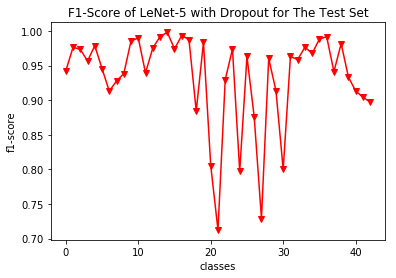

In [22]:
# plot f1 scores
path = './saved-lenet-w-dropout/best-test-f1-scores.pkl'
with open(path, mode='rb') as f:
    score_list = pickle.load(f)
    classes = np.arange(43)
    plt.plot(classes, score_list, marker='v', color='red')
    plt.title('F1-Score of LeNet-5 with Dropout for The Test Set')
    plt.ylabel('f1-score')
    plt.xlabel('classes')
    plt.show()
    plt.close()

#### The modified AlexNet

This model have been trained on different notebooks, please go [here](./salexnet-jittered-datasets-equal-n.nbconvert.ipynb) and [here](./salexnet-equal-n).

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [30]:
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import csv
import pickle

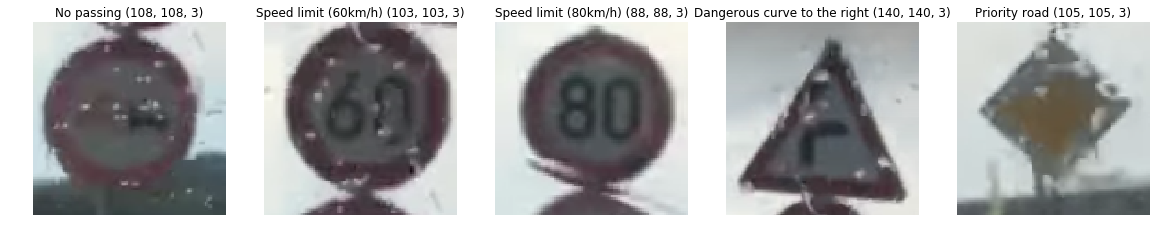

In [33]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
names = {}
with open('./signnames.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        names[int(row[0])] = row[1]
img_paths = glob.glob('./collected-data/*.png')
test_imgs = []
plt.figure(figsize=(20,30))
labels = [9, 3, 5, 20, 12]
for i, path in enumerate(img_paths):
    img = mpimg.imread(path)[:,:,0:3]
    test_imgs.append(img)
    plt.subplot(1,len(img_paths),i+1)
    plt.imshow(img)
    plt.title(names[labels[i]] + ' ' + str(img.shape))
    plt.axis('off')
plt.show()
plt.close()

(5, 32, 32, 3)
(5,)
[ 9  3  5 20 12]
1.0
-0.686275


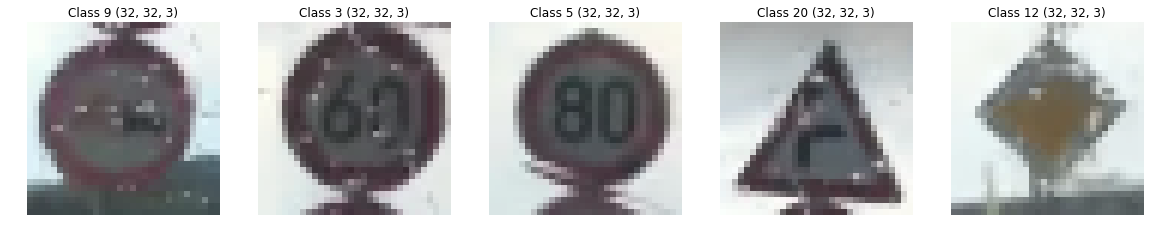

In [34]:
# resize and normalize
pixel_depth = 255.0
test_imgs_norm = []
plt.figure(figsize=(20,30))
for i, img in enumerate(test_imgs):
    sess = tf.Session()
    #resize
    resized = sess.run(tf.image.resize_images(img, (32,32)))
    # convert to uint
    resized = np.uint8(255 * resized / np.max(resized))
    plt.subplot(1,len(test_imgs),i+1)
    plt.imshow(resized)
    plt.imsave('./collected-data/resized/resized_' + str(labels[i]) + '.png', resized)
    plt.title('Class ' + str(labels[i]) + ' ' + str(resized.shape))
    plt.axis('off')
    test_imgs_norm.append(resized)
X_test_imgs_norm = np.array(test_imgs_norm)
y_test_labels = np.array(labels)
print(X_test_imgs_norm.shape)
print(y_test_labels.shape)
print(y_test_labels)
# normalize
X_test_imgs_norm = (
    X_test_imgs_norm.astype(np.float32)-(pixel_depth*0.5)) / (pixel_depth*0.5)
print(X_test_imgs_norm.max())
print(X_test_imgs_norm.min())
plt.show()
plt.close()

### Predict the Sign Type for Each Image

In [35]:
from scaledalexnet import *

In [36]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
model = ScaledAlexNet(num_labels=43,  image_size=32, batch_size=5)
model.init_model()
sess = tf.Session()
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, './saved-salexnet-aug-eq-n/best-model-session')
    test_accuracy, f1_scores = model.evaluate(
        X_test_imgs_norm, y_test_labels, sess=sess, f1score=True)
    print("Test accuracy with the best model: %.3f%%" 
                          % (test_accuracy * 100.))
    print('f1-scores of classes:')
    print(f1_scores)
    with open('./collected-data/best-test-f1-scores.pkl', 'wb') as f:
        pickle.dump(f1_scores, f)
    sess.close()

INFO:tensorflow:Restoring parameters from ./saved-salexnet-aug-eq-n/best-model-session
Test accuracy with the best model: 80.000%
f1-scores of classes:
[ 0.          0.          0.          0.          0.          0.99999857
  0.          0.          0.          0.99999857  0.          0.
  0.99999857  0.          0.          0.          0.          0.          0.
  0.          0.99999857  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


### Analyze Performance

In [37]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
scores = np.zeros((5,43))

with tf.Session() as sess:
    # restore session
    saver.restore(sess, './saved-salexnet-aug-eq-n/best-model-session')
    # compute scores
    scores = model.get_class_scores(X_test_imgs_norm, sess)[0]
tp = 0
for i, score in enumerate(scores):
    if np.argmax(score) == labels[i]:
        tp += 1
print('accuracy:')
print(str(tp/len(labels)*100) + '%')

INFO:tensorflow:Restoring parameters from ./saved-salexnet-aug-eq-n/best-model-session
accuracy:
80.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [38]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
sess = tf.Session()
scores_softmax = sess.run(tf.nn.softmax(scores))
top5 = sess.run(tf.nn.top_k(tf.constant(scores_softmax), k=5))
for i, score_sm in enumerate(scores_softmax):
    print('image ' + str(i))
    print(names[top5.indices[i][0]] + ' | ' 
          + names[top5.indices[i][1]] + ' | '
          + names[top5.indices[i][2]] + ' | '
          + names[top5.indices[i][3]] + ' | '
          + names[top5.indices[i][4]] + ' | ')
    print(top5.values[i])
    print('--------------------------------------')

image 0
No passing | No passing for vehicles over 3.5 metric tons | Speed limit (60km/h) | Speed limit (50km/h) | Speed limit (120km/h) | 
[  1.00000000e+00   1.35289380e-08   1.06118525e-09   1.15808668e-10
   9.19384846e-11]
--------------------------------------
image 1
Speed limit (20km/h) | Speed limit (120km/h) | Children crossing | Speed limit (60km/h) | No passing | 
[  9.99993682e-01   6.11881887e-06   1.69210452e-07   1.53469259e-07
   2.34250805e-08]
--------------------------------------
image 2
Speed limit (80km/h) | Speed limit (60km/h) | Speed limit (50km/h) | Speed limit (30km/h) | No passing for vehicles over 3.5 metric tons | 
[  9.99999285e-01   7.26889255e-07   3.31281469e-09   4.42142919e-11
   1.05825152e-13]
--------------------------------------
image 3
Dangerous curve to the right | Dangerous curve to the left | Slippery road | No passing | Vehicles over 3.5 metric tons prohibited | 
[  1.00000000e+00   6.29057695e-10   2.16327706e-10   3.47971443e-11
   8.5944

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")